In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import dual_annealing
#from bayes_opt import BayesianOptimization
from scipy.optimize import minimize
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error
from util_maxlike_1g_2025_log_log import *

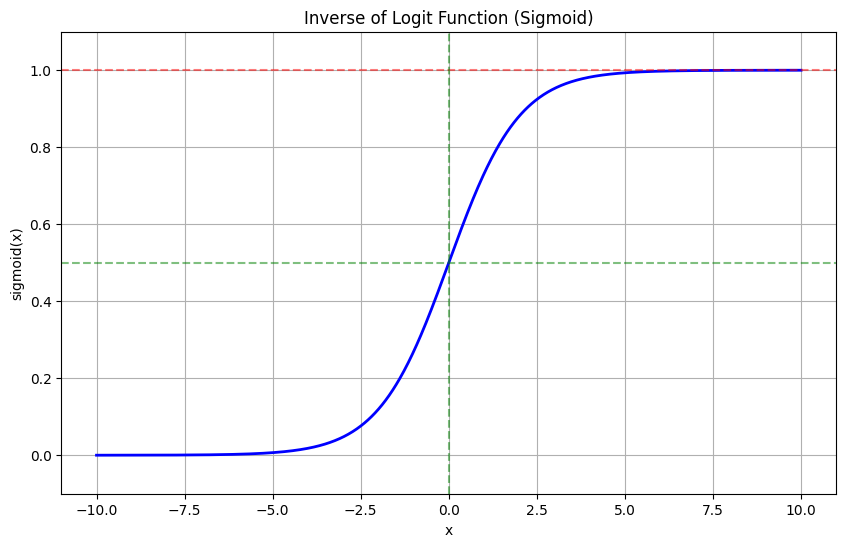

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function (inverse of logit)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create an array of x values from 0 to 10
x = np.linspace(-10, 10, 1000)

# Calculate the corresponding y values
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Inverse of Logit Function (Sigmoid)')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)

# Add horizontal asymptote at y=1
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)

# Add vertical line at x=0 and horizontal line at y=0.5
plt.axvline(x=0, color='g', linestyle='--', alpha=0.5)
plt.axhline(y=0.5, color='g', linestyle='--', alpha=0.5)

# Set y-axis limits
plt.ylim(-0.1, 1.1)

# Show the plot
plt.show()

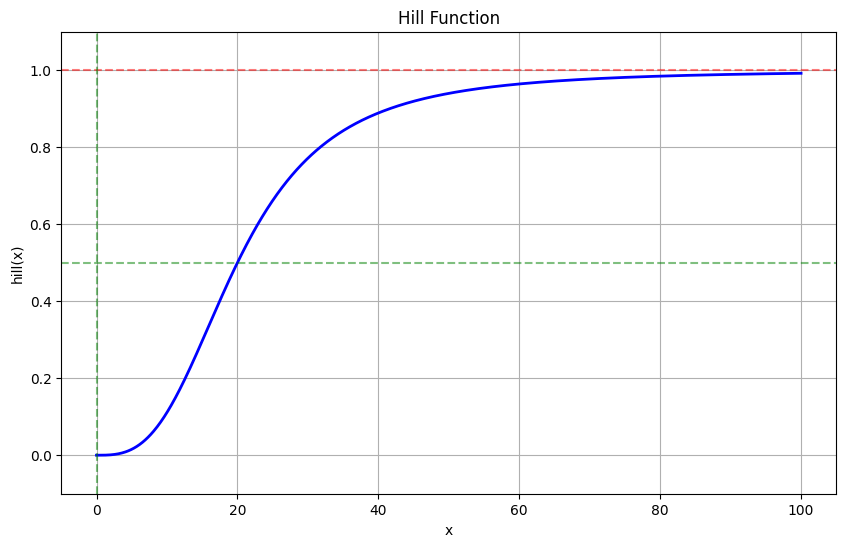

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function (inverse of logit)
def hill(x, a, b):
    return (x**b)/(a**b + x**b)
    #return 1 / (1 + np.exp(-x))

# Create an array of x values from 0 to 10
x = np.linspace(0, 100, 1000)

# Calculate the corresponding y values
y = hill(x, 20, 3)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Hill Function')
plt.xlabel('x')
plt.ylabel('hill(x)')
plt.grid(True)

# Add horizontal asymptote at y=1
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)

# Add vertical line at x=0 and horizontal line at y=0.5
plt.axvline(x=0, color='g', linestyle='--', alpha=0.5)
plt.axhline(y=0.5, color='g', linestyle='--', alpha=0.5)

# Set y-axis limits
plt.ylim(-0.1, 1.1)

# Show the plot
plt.show()

In [4]:
num_channels = 4

In [5]:
##### step 1 simulate the data
s1 = simulate_data(w = 156, L = 13, num_channels = 4, true_response = 'Hill', randomseed = 2024, 
                  ar12 = ['ar1', 'ar2', 'ar1', 'ar2'], 
                  ar_mean = [490, 500, 550, 420], 
                  ar_sd = [10, 10, 10, 10], 
                  ar_coefficients = {'ar1': [0.7], 'ar2': [0.3, 0.5]},
                  alpha_s = [0.2, 0.2, 0.2, 0.2], a_s = [800]*num_channels, b_s = [0.5]*num_channels, 
                  beta_s = [0.15]*num_channels, beta_price = -0.3, theta = 0.01,  
                  intercept = 0.1, sdd = 0.01,
                  revenue_p_unit = [2]*num_channels, cost_per_grp = [0.3]*num_channels
                  )
#s1[1]

In [6]:
s1[1]

[0.1904246448220744,
 0.18164072826751043,
 0.07317198692215014,
 0.3774198815927053]

In [7]:
ss = s1[0].copy()
tempt1 = s1[0].copy()
tempt1.drop(columns = ['y'], inplace = True)

In [8]:
num_channels = 4
#tempt1.head(3)

In [9]:
# Now let's get a new different set of parameters 
pred1 = generate_prediction_y(df = tempt1, num_channels = 4, L = 13, 
                              alpha_s = [0.2, 0.2, 0.2, 0.2], a_s = [800]*num_channels, b_s = [0.5]*num_channels, 
                              beta_s = np.array([0.15]*num_channels), beta_price = -0.3, theta = 0.01,  
                              intercept = 0.1, sdd = 1,
                              revenue_p_unit = [2]*num_channels, cost_per_grp = [0.3]*num_channels, generate = False,
                              assumed_response = 'Hill', randomseed = 2024)

In [10]:
pred1[1]

[0.19075249327976146,
 0.18199257330708404,
 0.07346962626645713,
 0.3778460854704536]

In [11]:
# Now let's get a new different set of parameters 
pred2 = generate_prediction_y(df = tempt1, num_channels = 4, L = 13, 
                              alpha_s = [0.2, 0.2, 0.2, 0.2], a_s = [800]*num_channels, b_s = [0.5]*num_channels, 
                              beta_s = np.array([0.2, 0.105, 0.099, 0.2]), beta_price = -0.3, theta = 0.01,  
                              intercept = 0.1, sdd = 0.01,
                              revenue_p_unit = [2]*num_channels, cost_per_grp = [0.3]*num_channels, generate = False,
                              assumed_response = 'Hill', randomseed = 2024)

In [12]:
pred2[1]

[0.41351010888199224,
 -0.07193238549080232,
 -0.1908434225814442,
 0.6417959851811386]

In [13]:
#### y_true 
y_true = ss
z1 = pred1[0].copy()
z2 = pred2[0].copy()
z1.rename(columns = {'y_hat': 'y_hat1'}, inplace = True)
z2.rename(columns = {'y_hat': 'y_hat2'}, inplace = True)
# create a df 
plot_df = pd.concat([y_true['y'], z1[['y_hat1']], z2[['y_hat2']]], axis = 1)


In [14]:
plot_df.head(4)

,y,y_hat1,y_hat2
0,103.393325,102.323355,102.323355
1,134.417741,134.492752,134.492752
2,151.979551,153.396522,153.396522
3,171.949795,173.374639,173.374639


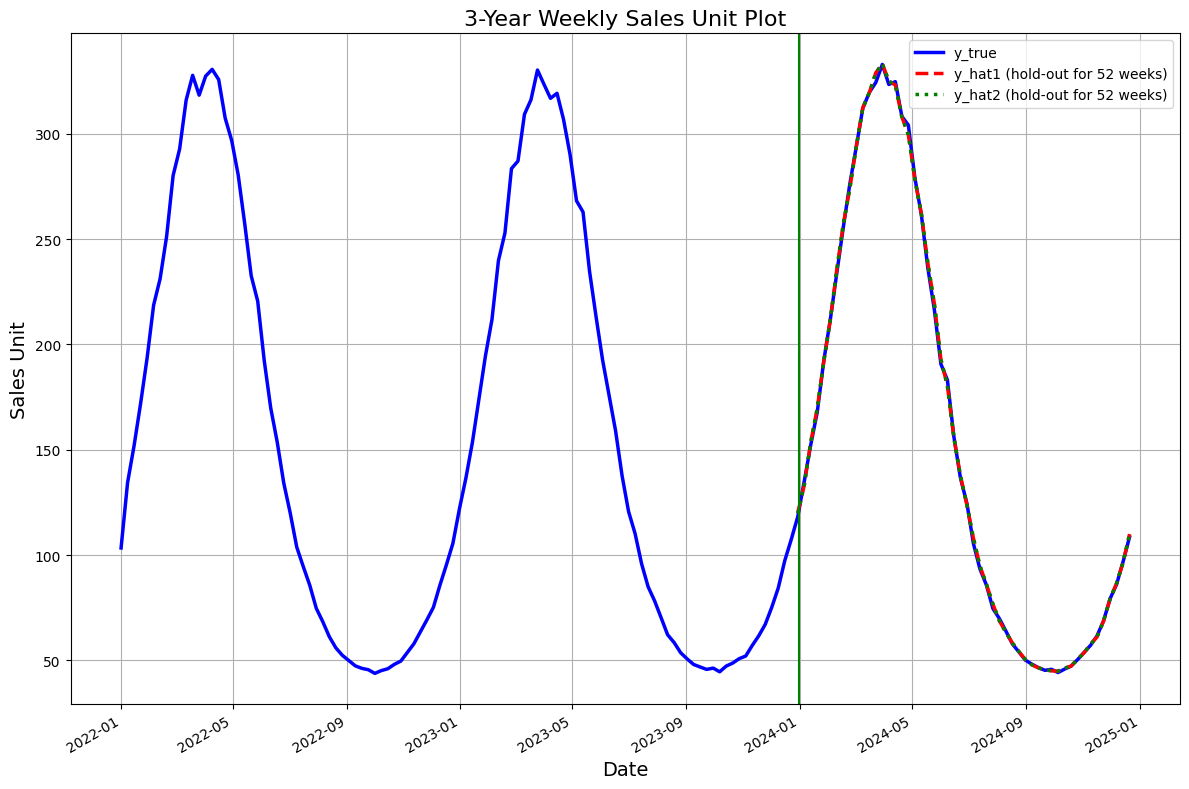

In [22]:
# Create sample data (you can replace this with your actual data)
n = 52 * 3
#data = np.random.rand(n, 3)
#df = pd.DataFrame(data, columns=['Col1', 'Col2', 'Col3'])

# Create date range for 3 years of weekly dates starting from 2022
start_date = datetime(2022, 1, 1)
dates = [start_date + timedelta(weeks=i) for i in range(n)]
plot_df['Date'] = dates

# Plot setup
plt.figure(figsize=(12, 8))

# Plot the first column against the dates
plt.plot(plot_df['Date'], plot_df['y'], label='y_true', color='blue', linewidth=2.5)

# Plot only the last 52 weeks of column 2 and 3
last_52_weeks = plot_df.iloc[-52:]
plt.plot(last_52_weeks['Date'], last_52_weeks['y_hat1'], label='y_hat1 (hold-out for 52 weeks)', 
         color='red', linestyle='--', linewidth=2.5)
plt.plot(last_52_weeks['Date'], last_52_weeks['y_hat2'], label='y_hat2 (hold-out for 52 weeks)', 
         color='green', linestyle=':', linewidth=2.5)

end_2023 = datetime(2023, 12, 31)
plt.axvline(x=end_2023, color='green', linestyle='-', linewidth=1.5)

# Customize the plot
plt.title('3-Year Weekly Sales Unit Plot', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales Unit', fontsize=14)
plt.legend()
plt.grid(True)

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, mape, rmse

actual = last_52_weeks['y']

# For Col2
mae_col2, mape_col2, rmse_col2 = calculate_metrics(actual, last_52_weeks['y_hat1'])

# For Col
mae_col3, mape_col3, rmse_col3 = calculate_metrics(actual, last_52_weeks['y_hat2'])

In [17]:
# Print the results
print("\nMetrics for the last 52 weeks:")
print("\nColumn 2 vs Column 1:")
print(f"MAE: {mae_col2:.4f}")
print(f"MAPE: {mape_col2:.4f}%")
print(f"RMSE: {rmse_col2:.4f}")

print("\nColumn 3 vs Column 1:")
print(f"MAE: {mae_col3:.4f}")
print(f"MAPE: {mape_col3:.4f}%")
print(f"RMSE: {rmse_col3:.4f}")


Metrics for the last 52 weeks:

Column 2 vs Column 1:
MAE: 1.0488
MAPE: 0.7672%
RMSE: 1.4885

Column 3 vs Column 1:
MAE: 1.0488
MAPE: 0.7672%
RMSE: 1.4885
